<a href="https://colab.research.google.com/github/GIThadasAI/yoganet/blob/main/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
data_root='/content/drive/My Drive/train data'

from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

train_datagen = ImageDataGenerator(        rescale=1./255,            # normalize pixel values to [0,1]
     )  

train_generator = train_datagen.flow_from_directory(
    data_root,
    target_size=(300, 300),
    color_mode="grayscale",
    class_mode='categorical')

Found 7229 images belonging to 10 classes.


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 297, 297, 16)      272       
_________________________________________________________________
activation_12 (Activation)   (None, 297, 297, 16)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 96, 96, 32)        8224      
_________________________________________________________________
activation_13 (Activation)   (None, 96, 96, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 29, 29, 64)       

Text(0.5, 1.0, 'MSE Loss')

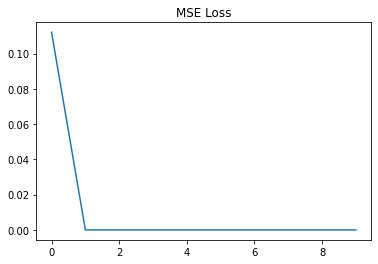

In [ ]:
image_size = 300 #image.sape
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(4,4),input_shape=(image_size,image_size,1)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D((3,3)),
    tf.keras.layers.Conv2D(32, kernel_size=(4,4)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D((3,3)),
    tf.keras.layers.Conv2D(64, kernel_size=(4,4)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D((3,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    # Predict classes probabilities (10 values) 
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(opt, loss='categorical_crossentropy')
model.summary()
history = model.fit_generator(generator=train_generator, epochs=10)
plt.plot(history.history['loss'])
plt.title('MSE Loss')

In [ ]:
tf.saved_model.save(model, '/content/drive/My Drive/')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/assets


In [25]:
imtest = cv2.imread('/content/drive/My Drive/1.jpg')
imtest.shape
imtestgray = cv2.cvtColor(imtest,cv2.COLOR_RGB2GRAY)
imtestgray.shape

(300, 300)

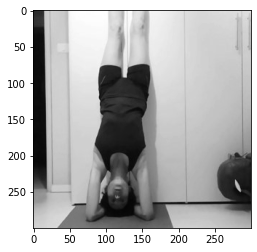

In [28]:
plt.imshow(imtestgray, cmap='gray')